In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('BP_dataset.csv')

BP_dataset = pd.DataFrame(data)

#Preparing seasonal values
seasonal_values = BP_dataset.copy()
seasonal_values['season'] = seasonal_values['month'].apply(lambda x: 'Winter' if x in ['12', '01', '02'] else ('Spring' if x in ['03', '04', '05'] else ('Summer' if x in ['06', '07', '08'] else 'Fall')))
seasonal_values_ex2024 = seasonal_values[:14]  # For simplicity, let's use the first 14 rows for demonstration

#Aggregat values for each year and season
seasonal_values_ex2024_agg = seasonal_values_ex2024.groupby(['year', 'season'])['value'].sum().reset_index()

# Pivoting the DataFrame
seasonal_values_ex2024_pivot = seasonal_values_ex2024_agg.pivot(index='year', columns='season', values='value')



### Variables

#### BP_dataset: A DataFrame created as a copy of data for operations.
#### Seasonal_values: A DataFrame derived from BP_dataset where a new column for seasons is added based on the month.
#### x_labels: List of strings combining year and season for custom x-axis labels in a plot. 
#### future_years: An array containing additional years for which predictions are made.   

     

#### Annual consumption of natural gas in the US in millions of cubic feet (MMCF)

In [2]:
df = pd.read_csv('BP_dataset.csv')
df.head()
annual_value = df.groupby('year')['value'].sum()
annual_value

year
2014     99736609.0
2015    102211748.0
2016    103080712.0
2017    101646612.0
2018    112843425.0
2019    116005043.0
2020    113767103.0
2021    113636162.0
2022    119863974.0
2023    118797360.0
2024     13005655.0
Name: value, dtype: float64

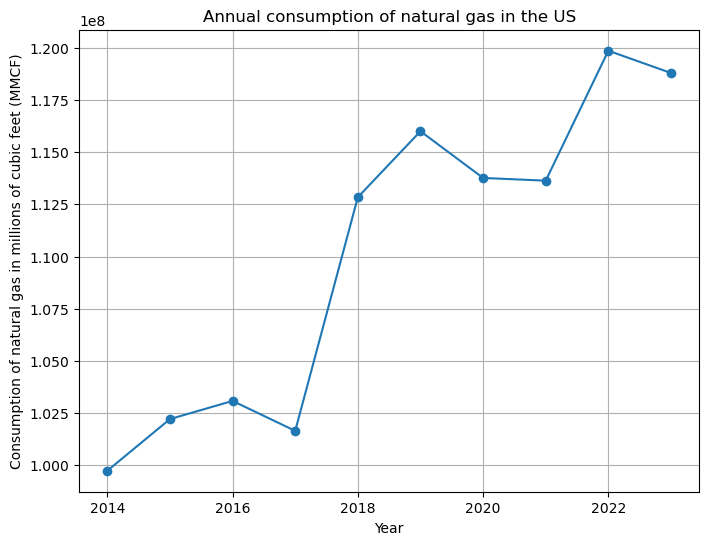

In [32]:
annual_value_without_2024 = annual_value.loc[:2023] 
fig, ax = plt.subplots(figsize = (8,6))
ax.plot(annual_value_without_2024, marker = 'o')
plt.xlabel('Year')
plt.ylabel('Consumption of natural gas in millions of cubic feet (MMCF)')
plt.title('Annual consumption of natural gas in the US')
plt.grid(True)
plt.show()

#### Seasonal consumption of natural gas in the US

In [4]:
# Assuming df is DataFrame
# Defining a function to map months to seasons
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

#Creating a new column for seasons
df['season'] = df['month'].apply(get_season)

#Grouping by year and season, then sum the values
seasonal_values = df.groupby(['year', 'season'])['value'].sum().reset_index()

print(seasonal_values)

    year  season       value
0   2014    Fall  22682242.0
1   2014  Spring  23694556.0
2   2014  Summer  20649115.0
3   2014  Winter  32710696.0
4   2015    Fall  22914905.0
5   2015  Spring  24152092.0
6   2015  Summer  22443915.0
7   2015  Winter  32700836.0
8   2016    Fall  22542201.0
9   2016  Spring  23967506.0
10  2016  Summer  23943817.0
11  2016  Winter  32627188.0
12  2017    Fall  23506635.0
13  2017  Spring  23712357.0
14  2017  Summer  22903828.0
15  2017  Winter  31523792.0
16  2018    Fall  26680005.0
17  2018  Spring  26942067.0
18  2018  Summer  25048603.0
19  2018  Winter  34172750.0
20  2019    Fall  27067753.0
21  2019  Spring  27037885.0
22  2019  Summer  25735928.0
23  2019  Winter  36163477.0
24  2020    Fall  25664685.0
25  2020  Spring  26180240.0
26  2020  Summer  25984033.0
27  2020  Winter  35938145.0
28  2021    Fall  26130637.0
29  2021  Spring  25947954.0
30  2021  Summer  26203084.0
31  2021  Winter  35354487.0
32  2022    Fall  27398662.0
33  2022  Spri

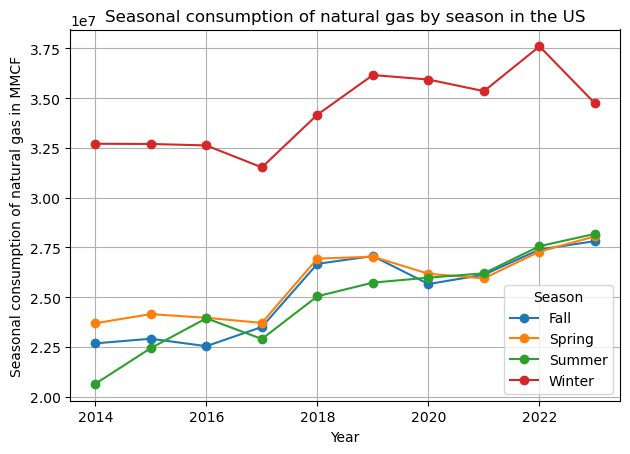

In [5]:
seasonal_values_ex2024 = seasonal_values[:40]
seasonal_values_ex2024_pivot = seasonal_values_ex2024.pivot(index='year', columns='season', values='value')

# Plot the values against the year for each season
seasonal_values_ex2024_pivot.plot(marker='o', linestyle='-')

# Add labels and title
plt.title('Seasonal consumption of natural gas by season in the US')
plt.xlabel('Year')
plt.ylabel('Seasonal consumption of natural gas in MMCF')
plt.grid(True)
plt.legend(title='Season')
plt.tight_layout()
plt.show()


In [6]:
df['process-name'].unique()

array(['Commercial Consumption', 'Vehicle Fuel Consumption',
       'Electric Power Consumption', 'Delivered to Consumers',
       'Industrial Consumption', 'Residential Consumption',
       'Pipeline Fuel Consumption', 'Lease and Plant Fuel Consumption'],
      dtype=object)

In [7]:
consumption_by_use = df.groupby('process-name')['value'].sum()
consumption_by_use

process-name
Commercial Consumption               67513144.0
Delivered to Consumers              543148364.0
Electric Power Consumption          215847239.0
Industrial Consumption              163990399.0
Lease and Plant Fuel Consumption     17433791.0
Pipeline Fuel Consumption             9402492.0
Residential Consumption              96269430.0
Vehicle Fuel Consumption               989544.0
Name: value, dtype: float64

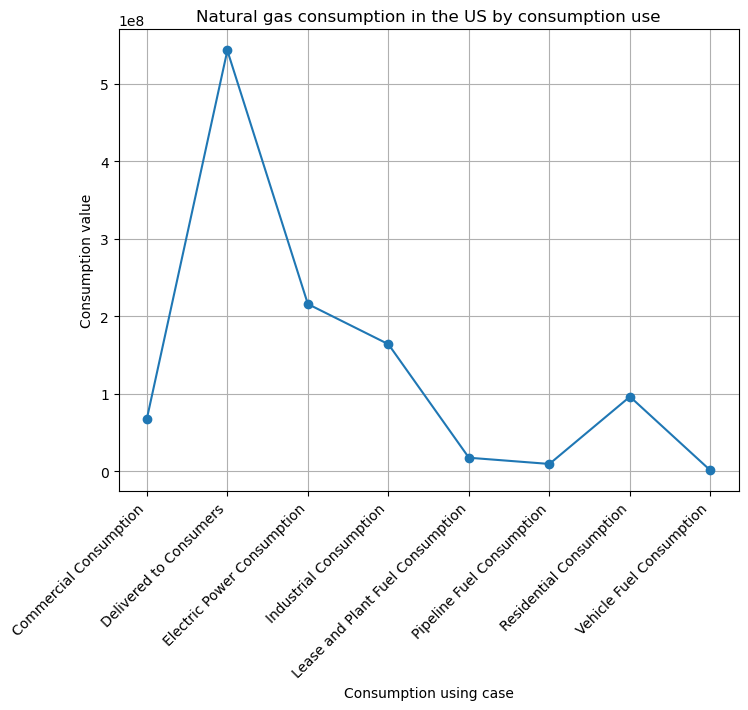

In [8]:
fig, ax = plt.subplots(figsize = (8,6))
ax.plot(consumption_by_use, marker = 'o')
plt.xticks(rotation = 45, ha = 'right')
plt.xlabel('Consumption using case')
plt.ylabel('Consumption value')
plt.title('Natural gas consumption in the US by consumption use')
plt.grid(True)
plt.show()

In [9]:
seasonal_cases = df.groupby(['year', 'season', 'process-name'])['value'].sum().reset_index()
seasonal_cases

,year,season,process-name,value
0,2014,Fall,Commercial Consumption,1425605.0
1,2014,Fall,Delivered to Consumers,11068416.0
2,2014,Fall,Electric Power Consumption,4149456.0
3,2014,Fall,Industrial Consumption,3721062.0
4,2014,Fall,Lease and Plant Fuel Consumption,386487.0
...,...,...,...,...
323,2024,Winter,Industrial Consumption,1561164.0
324,2024,Winter,Lease and Plant Fuel Consumption,165729.0
325,2024,Winter,Pipeline Fuel Consumption,138786.0
326,2024,Winter,Residential Consumption,1673886.0


In [10]:
seasonal_cases_pivot = seasonal_cases.pivot(index=['year', 'season'], columns='process-name', values='value')
seasonal_cases_pivot.index.shape

(41,)

<Figure size 1400x800 with 0 Axes>

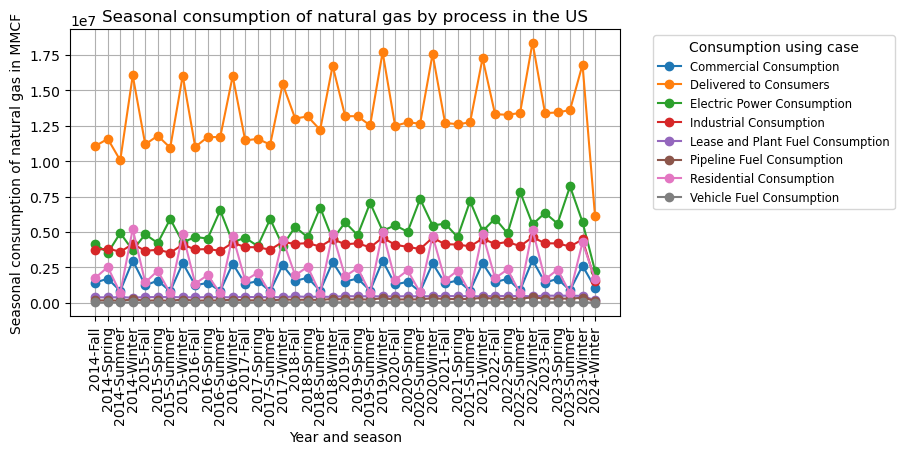

In [11]:
#Assuming seasonal_cases_pivot is your DataFrame
#Combining 'year' and 'season' into a single string for x-axis labels
x_labels = [f"{year}-{season}" for year, season in seasonal_cases_pivot.index]

#Plot the values against the year for each season
plt.figure(figsize=(14, 8))  # Set the figsize
seasonal_cases_pivot.plot(marker='o', linestyle='-')

#Adding labels and title
plt.title('Seasonal consumption of natural gas by process in the US')
plt.xlabel('Year and season')
plt.ylabel('Seasonal consumption of natural gas in MMCF')

#Show all x-ticks labels
plt.xticks(range(len(x_labels)), x_labels, rotation=90, ha='center')

#Ensure all x-tick labels are shown without overlap
plt.tight_layout()

#Minimize the legend size
plt.legend(title='Consumption using case', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')

plt.grid(True)
plt.show()


#### Annual consumption by process

In [12]:
annual_consumption = df.groupby(['year', 'process-name'])['value'].sum().reset_index()
pivot_df = annual_consumption.pivot(index='year', columns='process-name', values='value')
pivot_df

process-name,Commercial Consumption,Delivered to Consumers,Electric Power Consumption,Industrial Consumption,Lease and Plant Fuel Consumption,Pipeline Fuel Consumption,Residential Consumption,Vehicle Fuel Consumption
year,,,,,,,,
2014,6932612.0,48762164.0,16291966.0,15292081.0,1512143.0,700151.0,10174927.0,70565.0
2015,6403469.0,49978573.0,19226742.0,15043809.0,1576389.0,678183.0,9225776.0,78807.0
2016,6219168.0,50424318.0,19970546.0,15457379.0,1545330.0,686731.0,8693193.0,84047.0
2017,6329218.0,49669433.0,18531115.0,15886029.0,1585903.0,721865.0,8826646.0,96403.0
2018,7027907.0,55136320.0,21177881.0,16834597.0,1694238.0,876534.0,9995106.0,100842.0
2019,7029122.0,56582007.0,22576207.0,16833317.0,1822939.0,1018093.0,10037030.0,106328.0
2020,6325322.0,55461924.0,23263441.0,16425949.0,1825380.0,1017904.0,9348920.0,98263.0
2021,6578147.0,55326978.0,22457176.0,16749357.0,1850742.0,1131473.0,9433312.0,108977.0
2022,7018151.0,58386181.0,24232450.0,17073745.0,1882803.0,1212337.0,9928323.0,129984.0


### Forecasted MSE for the year 2024

In [18]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np

# Load the dataset
data = pd.read_csv('BP_dataset.csv')

# Convert 'year' to datetime and extract year if not already in year format
data['year'] = pd.to_datetime(data['year'], format='%Y').dt.year

# Exclude data from 2024
data = data[data['year'] != 2024]

# Aggregate data by year, summing the gas consumption
annual_data = data.groupby('year')['value'].sum().reset_index()

# Reshape the data for modeling
X = annual_data['year'].values.reshape(-1,1)
y = annual_data['value'].values

# Create and fit the model
model = LinearRegression()
model.fit(X, y)

#Predicting for 2024
year_2024 = np.array([[2024]])
predicted_consumption_2024 = model.predict(year_2024)
print(f"Forecasted Gas Consumption for 2024: {predicted_consumption_2024[0]} MMCF")

from sklearn.metrics import mean_squared_error, r2_score

#Predict on the known data to evaluate the model
y_pred = model.predict(X)

#Calculating metrics
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')


Forecasted Gas Consumption for 2024: 123072630.8666668 MMCF
Mean Squared Error: 7483326432844.545
R² Score: 0.858711101046309


### Forecasted model 

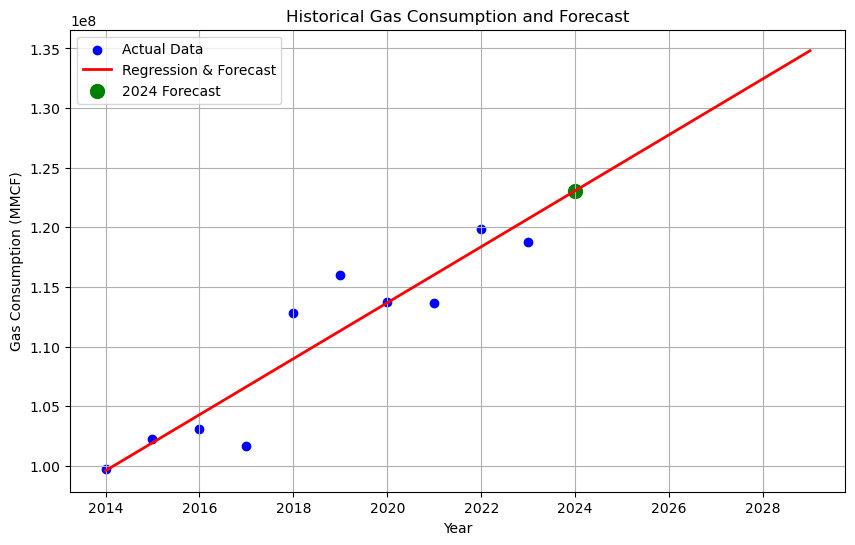

In [19]:
import matplotlib.pyplot as plt

#Forecasting for additional years if needed
future_years = np.array([[year] for year in range(2025, 2030)])  # Forecasting till 2029 for a broader view
future_predictions = model.predict(future_years)

#Combining all years and predictions for plotting
all_years = np.concatenate((X, year_2024, future_years))
all_predictions = np.concatenate((y_pred, predicted_consumption_2024, future_predictions))

#Plot the actual data
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Data')  # Actual data points

#Ploting the regression line including forecasts
plt.plot(all_years, all_predictions, color='red', linestyle='-', linewidth=2, label='Regression & Forecast')

#Highlight the forecast point
plt.scatter(year_2024, predicted_consumption_2024, color='green', s=100, label='2024 Forecast')

#Enhancing the plot
plt.title('Historical Gas Consumption and Forecast')
plt.xlabel('Year')
plt.ylabel('Gas Consumption (MMCF)')
plt.grid(True)
plt.legend()

#Show plot
plt.show()


### Regression model until 2023

In [15]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

data = pd.read_csv('BP_dataset.csv')

#Assuming the dataset includes a 'year' column and a 'value' column for gas consumption
data['year'] = pd.to_datetime(data['year'].astype(str), format='%Y').dt.year  # Ensuring 'year' is an integer

#Excluding the year 2024
data = data[data['year'] != 2024]

print(data.head())


   year  month duoarea area-name product product-name process  \
0  2014      1     SFL   FLORIDA    EPG0  Natural Gas     VCS   
1  2014      1     SNH    USA-NH    EPG0  Natural Gas     VCS   
2  2014      1     SOR    USA-OR    EPG0  Natural Gas     VCS   
3  2014      1     SDE    USA-DE    EPG0  Natural Gas     VCS   
4  2014      1     SAZ    USA-AZ    EPG0  Natural Gas     VCS   

             process-name    series  \
0  Commercial Consumption  N3020FL2   
1  Commercial Consumption  N3020NH2   
2  Commercial Consumption  N3020OR2   
3  Commercial Consumption  N3020DE2   
4  Commercial Consumption  N3020AZ2   

                                  series-description   value units  
0  Natural Gas Deliveries to Commercial Consumers...  6605.0  MMCF  
1  Natural Gas Deliveries to Commercial Consumers...  1691.0  MMCF  
2  Natural Gas Deliveries to Commercial Consumers...  4711.0  MMCF  
3  Natural Gas Deliveries to Commercial Consumers...  2128.0  MMCF  
4  Natural Gas Deliveries to 

In [16]:
#Aggregate gas consumption by year
annual_data = data.groupby('year')['value'].sum().reset_index()

#Preparing independent and dependent variables
X = annual_data['year'].values.reshape(-1, 1)  # Reshape for sklearn
y = annual_data['value'].values

#Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Creating and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

#Predicting on the test set
y_pred = model.predict(X_test)

#Calculating metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')


Mean Squared Error: 1955800478446.6736
R² Score: 0.9748935342437951


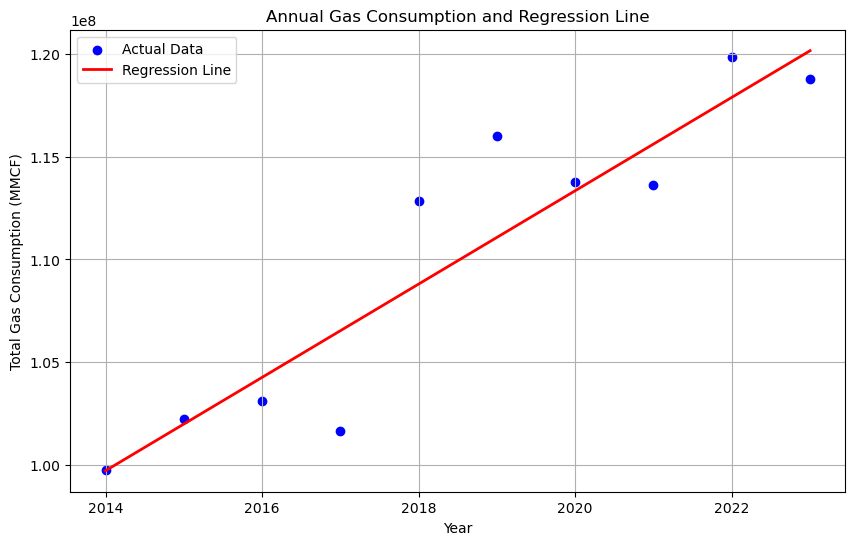

In [17]:
# Plotting regression line and actual data points
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, model.predict(X), color='red', linewidth=2, label='Regression Line')
plt.title('Annual Gas Consumption and Regression Line')
plt.xlabel('Year')
plt.ylabel('Total Gas Consumption (MMCF)')
plt.legend()
plt.grid(True)
plt.show()


In [25]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Example DataFrame creation
data = {
    'year': np.random.randint(2000, 2023, size=100),
    'value': np.random.rand(100) * 1000  # Random numeric data
}
df = pd.DataFrame(data)

# Convert year to a numeric type explicitly
df['year'] = pd.to_numeric(df['year'], errors='coerce')
df.dropna(inplace=True)

# Add a constant column for VIF calculation
df = add_constant(df)

# Calculate VIF
vif_data = pd.DataFrame({
    'Feature': df.columns,
    'VIF': [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
})

print(vif_data)


  Feature            VIF
0   const  102000.880042
1    year       1.000235
2   value       1.000235


Adjusted Mean Squared Error: 80048847.36873876
Adjusted R² Score: 0.0005755887785107161


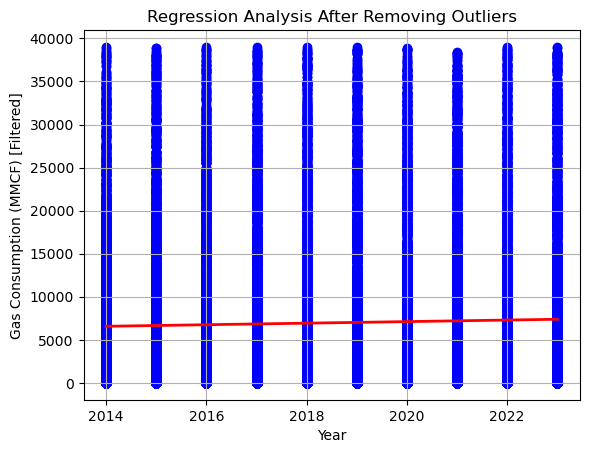

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Prepare the data
X = filtered_data['year'].values.reshape(-1, 1)
y = filtered_data['value'].values

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and calculate metrics
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Adjusted Mean Squared Error: {mse}')
print(f'Adjusted R² Score: {r2}')

# Visualize the regression line with the adjusted dataset
plt.scatter(X, y, color='blue')
plt.plot(X, model.predict(X), color='red', linewidth=2)
plt.xlabel('Year')
plt.ylabel('Gas Consumption (MMCF) [Filtered]')
plt.title('Regression Analysis After Removing Outliers')
plt.grid(True)
plt.show()


Polynomial Regression Mean Squared Error: 80063674.30867413
Polynomial Regression R² Score: 0.00039047173807593705


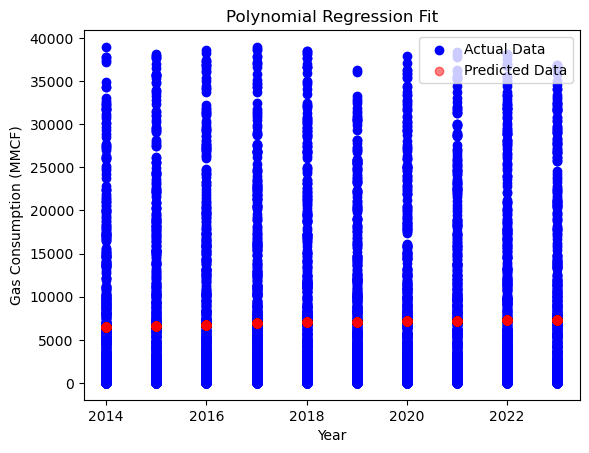

In [31]:
from sklearn.preprocessing import PolynomialFeatures

# Generating polynomial features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train)

# Fit a linear regression model on the polynomial features
poly_model = LinearRegression()
poly_model.fit(X_poly, y_train)

# Use the model to make predictions on the test set
X_test_poly = poly.transform(X_test)
y_pred_poly = poly_model.predict(X_test_poly)

# Calculate the new metrics
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f'Polynomial Regression Mean Squared Error: {mse_poly}')
print(f'Polynomial Regression R² Score: {r2_poly}')

# Visualize the regression fit
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.scatter(X_test, y_pred_poly, color='red', label='Predicted Data', alpha=0.5)
plt.legend()
plt.title('Polynomial Regression Fit')
plt.xlabel('Year')
plt.ylabel('Gas Consumption (MMCF)')
plt.show()
